In [14]:
import os
from datetime import datetime, timedelta

# Define the base path to BGC CMEMS data on WEkEO
base_path = "/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209"

# Define date range
start_date = datetime(2020, 6, 1)  # Starting date (YYYY, MM, DD)
end_date = datetime(2020, 6, 30)   # Ending date (YYYY, MM, DD)

# Define the strings that are used to filter files
filters = {"30U", "P1D", "transp"}

# Define a list to store paths of relevant files
paths = []

# Loop through the dates in the specified range
current_date = start_date
while current_date <= end_date:
    # Format year, month, day as strings
    year = current_date.strftime("%Y")
    month = current_date.strftime("%m")
    day = current_date.strftime("%d")

    # Define the directory path
    folder_path = os.path.join(base_path, year, month, day)

    # Check if the directory exists
    if os.path.isdir(folder_path):
        # Loop through each file in the day directory
        for file_name in os.listdir(folder_path):
            # Check if the file name contains the filter strings
            if all(f in file_name for f in filters):
                file_path = os.path.join(folder_path, file_name)
                paths.append(file_path)
                # Found matching file, move on to the next folder
                break

    # Move to the next day
    current_date += timedelta(days=1)

In [15]:
paths

['/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/01/20200601_P1D_CMEMS_HROC_L4-transp_NWS_30U_100m-v01.nc',
 '/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/02/20200602_P1D_CMEMS_HROC_L4-transp_NWS_30U_100m-v01.nc',
 '/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/05/20200605_P1D_CMEMS_HROC_L4-transp_NWS_30U_100m-v01.nc',
 '/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/07/20200607_P1D_CMEMS_HROC_L4-transp_NWS_30U_100m-v01.nc',
 '/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/08/20200608_P1D_CMEMS_HROC_L4-transp_NWS_30U_100m-v01.nc',
 '/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/11/20200611_P1D_CMEMS_HROC_L4-transp_NWS_30U_100m-v01.nc',
 '/home/jovyan/eodata/CMEMS/NRT/NWS/BGC/OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209/2020/06/13/20200613_P1D_CMEMS_HROC_L4-transp_NWS_30U

In [16]:
import xarray as xr

In [22]:
turbidity_data = xr.open_dataset(paths[1])

In [23]:
print(turbidity_data)

<xarray.Dataset> Size: 238MB
Dimensions:  (time: 1, lat: 8640, lon: 3435)
Coordinates:
  * time     (time) datetime64[ns] 8B 2020-06-02
  * lat      (lat) float64 69kB 56.0 56.0 56.0 56.0 56.0 ... 48.0 48.0 48.0 48.0
  * lon      (lon) float64 27kB -6.0 -5.998 -5.997 ... -0.002621 -0.0008735
Data variables:
    crs      int32 4B ...
    SPM      (time, lat, lon) float32 119MB ...
    TUR      (time, lat, lon) float32 119MB ...
Attributes: (12/44)
    TileSize:                   540:286
    id:                         20200602_P1D_CMEMS_HROC_L4_transp_nws_30U_100...
    title:                      CMEMS HR-OC North-West Shelf transparency (SP...
    region:                     NWS
    tile:                       30U
    cmems_product_id:           OCEANCOLOUR_NWS_BGC_HR_L4_NRT_009_209
    ...                         ...
    time_coverage_start:        20200602T000000Z
    time_coverage_stop:         20200602T235959Z
    time_coverage_duration:     P1D
    time_coverage_resolution:   P1D

In [24]:
import matplotlib.pyplot as plt

In [25]:
turbidity = turbidity_data['TUR']

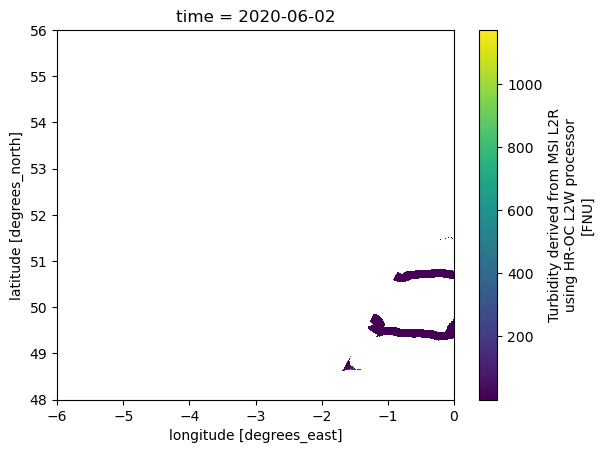

In [26]:
turbidity.isel(time=0).plot(cmap='viridis')